# Загрузка датасета с kaggle
Скачивание датасета с kaggle делается по инструкции https://www.kaggle.com/general/74235

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"plpolina","key":"dfd9031618c29650b234e0f5d156ab19"}'}

In [11]:
!ls -lha kaggle.json
!pip install -q kaggle

-rw-r--r-- 1 root root 64 Oct  6 17:25 kaggle.json


In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [13]:
!chmod 600 /root/.kaggle/kaggle.json

In [14]:
!kaggle datasets download -d ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

  0% 0.00/532k [00:00<?, ?B/s]
100% 532k/532k [00:00<00:00, 71.3MB/s]


In [15]:
!unzip ecommerce-customer-churn-analysis-and-prediction.zip

Archive:  ecommerce-customer-churn-analysis-and-prediction.zip
  inflating: E Commerce Dataset.xlsx  


In [16]:
!pwd
!ls

/content
 ecommerce-customer-churn-analysis-and-prediction.zip  'kaggle (1).json'
'E Commerce Dataset.xlsx'			        kaggle.json
 gdrive						        sample_data


In [17]:
!mv 'E Commerce Dataset.xlsx' e_commerce_dataset.xlsx

# Задача: анализ и прогнозирование оттока клиентов электронной коммерции

Набор данных содержит информацию о клиентах компании, занимающейся онлайн торговлей. Необходимо предсказать, какие из клиентов собираются уйти (отказаться от услуг компании), чтобы можно было обратиться к ним с дополнительными акциями или предложениями и попробовать таким образом удержать их.

# 1. Загрузка данных

In [19]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [108]:
dataset_path = 'e_commerce_dataset.xlsx'
data_raw = pd.read_excel(dataset_path, sheet_name='E Comm')

В таблице содержатся данные о 5630 клиентах компании. 

In [51]:
data_raw.shape

(5630, 20)

In [52]:
data_raw.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


Данные содержат следующие признаки:
- `CustomerID` - ID клиента
- `Churn` - целевой признак, означающий покинул клиент компанию (1) или нет (0)
- `Tenure` - срок пребывания клиента в организации
- `PreferredLoginDevice`- предпочтительный девайс клиента для входа в аккаунт 
- `CityTier` - уровень города клиента
- `WarehouseToHome` - расстояние от склада до дома клиента
- `PreferredPaymentMode` - предпочтительный метод оплаты
- `Gender` - пол клиента
- `HourSpendOnApp` - время (в часах), проведенное клиентом в приложении или на сайте
- `NumberOfDeviceRegistered` - общее количество девайсов зарегистрированных на клиента
- `PreferedOrderCat` - предпочтительная категория заказов клиента в прошлом месяце
- `SatisfactionScore` - оценка удовлетворенности клиента сервисом
- `MaritalStatus` - семейное положение
- `NumberOfAddress` - общее количество адресов, добавленных покупателем
- `Complain` - были ли жалобы от клиента в прошлом месяцы 
- `OrderAmountHikeFromlastYear` - увеличение суммы заказов по сравнению с прошлым годом (в процентах)
- `CouponUsed` - количество купонов, использованных в прошлом месяце
- `OrderCount` - количество заказов в прошлом месяце
- `DaySinceLastOrder` - количество дней с момента последнего заказа
- `CashbackAmount` - средний кэшбэк за последний месяц

Необходимо разделить клиентов на 2 класса - на тех, кто покидает компанию и тех, кто остается. Целевым признаком выступает `Churn`.


Рассмотрим типы данных:

In [53]:
data_raw.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

У категориальных признаков заменим тип с 'object' на специальный:

In [109]:
for col in data_raw.columns:
  if data_raw[col].dtype == 'object':
    print(col)
    print(pd.unique(data_raw[col]))
    data_raw[col] = data_raw[col].astype('category')
    print()

PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']

PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender
['Female' 'Male']

PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

MaritalStatus
['Single' 'Divorced' 'Married']



Данные не содержат дубликатов:

In [71]:
data_raw.duplicated().sum()

0

## Основные характеристики и визуализация данных

In [85]:
data_raw.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


Вычислим и визуализируем матрицу корреляции:

In [91]:
corr_mat = data_raw.corr()
corr_mat

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,1.000000,-0.019083,0.029952,0.003239,0.058909,0.598417,0.411098,-0.033146,0.160814,-0.009944,0.117243,0.234302,0.139008,0.113243,0.217129
Churn,-0.019083,1.000000,-0.349408,0.084703,0.076630,0.018675,0.107939,0.105481,0.043931,0.250188,-0.010058,-0.008264,-0.028697,-0.160757,-0.154118
Tenure,0.029952,-0.349408,1.000000,-0.060688,-0.018218,-0.021226,-0.023983,-0.013903,0.237666,-0.021268,0.005825,0.129035,0.186403,0.184552,0.476380
CityTier,0.003239,0.084703,-0.060688,1.000000,0.010624,-0.009150,0.027934,-0.011554,-0.029440,0.003375,-0.031408,0.021456,0.033388,0.017525,0.055746
WarehouseToHome,0.058909,0.076630,-0.018218,0.010624,1.000000,0.060990,0.019071,0.007722,-0.011020,0.028696,0.038795,-0.003935,0.002681,0.017829,-0.009200
HourSpendOnApp,0.598417,0.018675,-0.021226,-0.009150,0.060990,1.000000,0.316800,0.031858,0.145126,0.006976,0.106843,0.191528,0.109575,0.075716,0.121490
NumberOfDeviceRegistered,0.411098,0.107939,-0.023983,0.027934,0.019071,0.316800,1.000000,-0.017228,0.084997,0.003407,0.069475,0.151685,0.103464,0.018208,0.137183
SatisfactionScore,-0.033146,0.105481,-0.013903,-0.011554,0.007722,0.031858,-0.017228,1.000000,0.053583,-0.031115,-0.027730,0.017936,0.019764,0.032082,0.003473
NumberOfAddress,0.160814,0.043931,0.237666,-0.029440,-0.011020,0.145126,0.084997,0.053583,1.000000,-0.026399,0.015533,0.042120,-0.007609,-0.064847,0.186688
Complain,-0.009944,0.250188,-0.021268,0.003375,0.028696,0.006976,0.003407,-0.031115,-0.026399,1.000000,-0.004529,-0.008174,-0.019307,-0.043546,0.000525


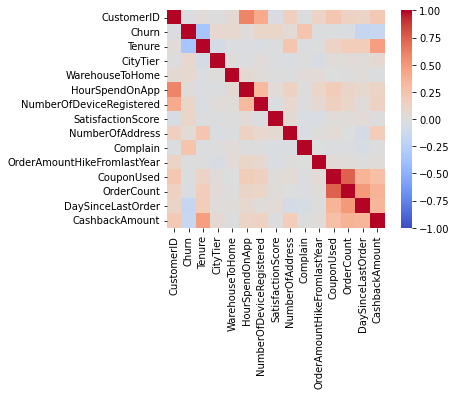

In [90]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

Видно, что количество сделанных заказов и количество использованных купонов достаточно сильно коррелированы (0.75). Срок пребывания клиента в компании отрицательно коррелирован с признаком `Churn`(1 - клиент покинул компанию, 0 - клиент остался), т.е. чем дольше клиент уже пользуется услугами компании, тем с большей вероятностью он останется с ней.

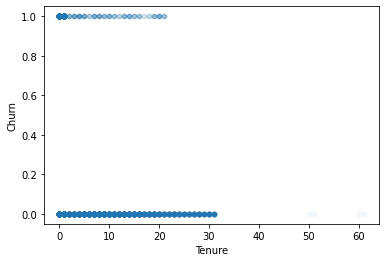

In [93]:
data_raw.plot(kind = 'scatter', x = 'Tenure', y = 'Churn', alpha=.05)
pass

Количество заказов увеличивается вместе со временем, которое клиент провел в приложении:

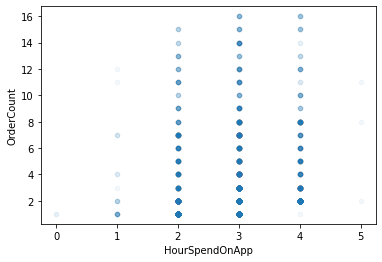

In [95]:
data_raw.plot(kind = 'scatter', x = 'HourSpendOnApp', y = 'OrderCount', alpha=.05)
pass

Построим диаграммы рассеивания для 1000 случайно выбранных точек:

In [99]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)

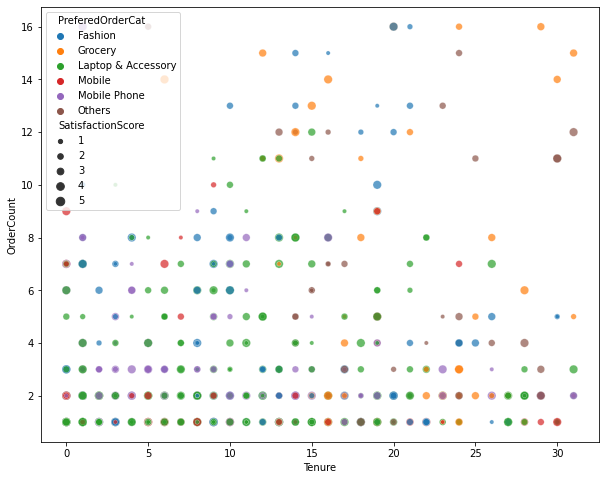

In [102]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='Tenure', y='OrderCount', size='SatisfactionScore', hue='PreferedOrderCat', data=data_raw.iloc[random_subset], alpha=0.7)
pass

## Борьба с пропущенными значениями
Столбцы признаков `Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, `DaySinceLastOrder` содержат пропущенные значения:



In [194]:
data = data_raw.copy()
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Заполним пропущенные значения медианными значениями столбцов соответствующих признаков:

In [195]:
feat = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
data[feat].median(axis = 0)
data[feat] = data[feat].fillna(data[feat].median(axis = 0), axis=0)
data.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

## Борьба с выбросами

Выбросы содержатся в стоблцах признаков

Text(0, 0.5, 'Values')

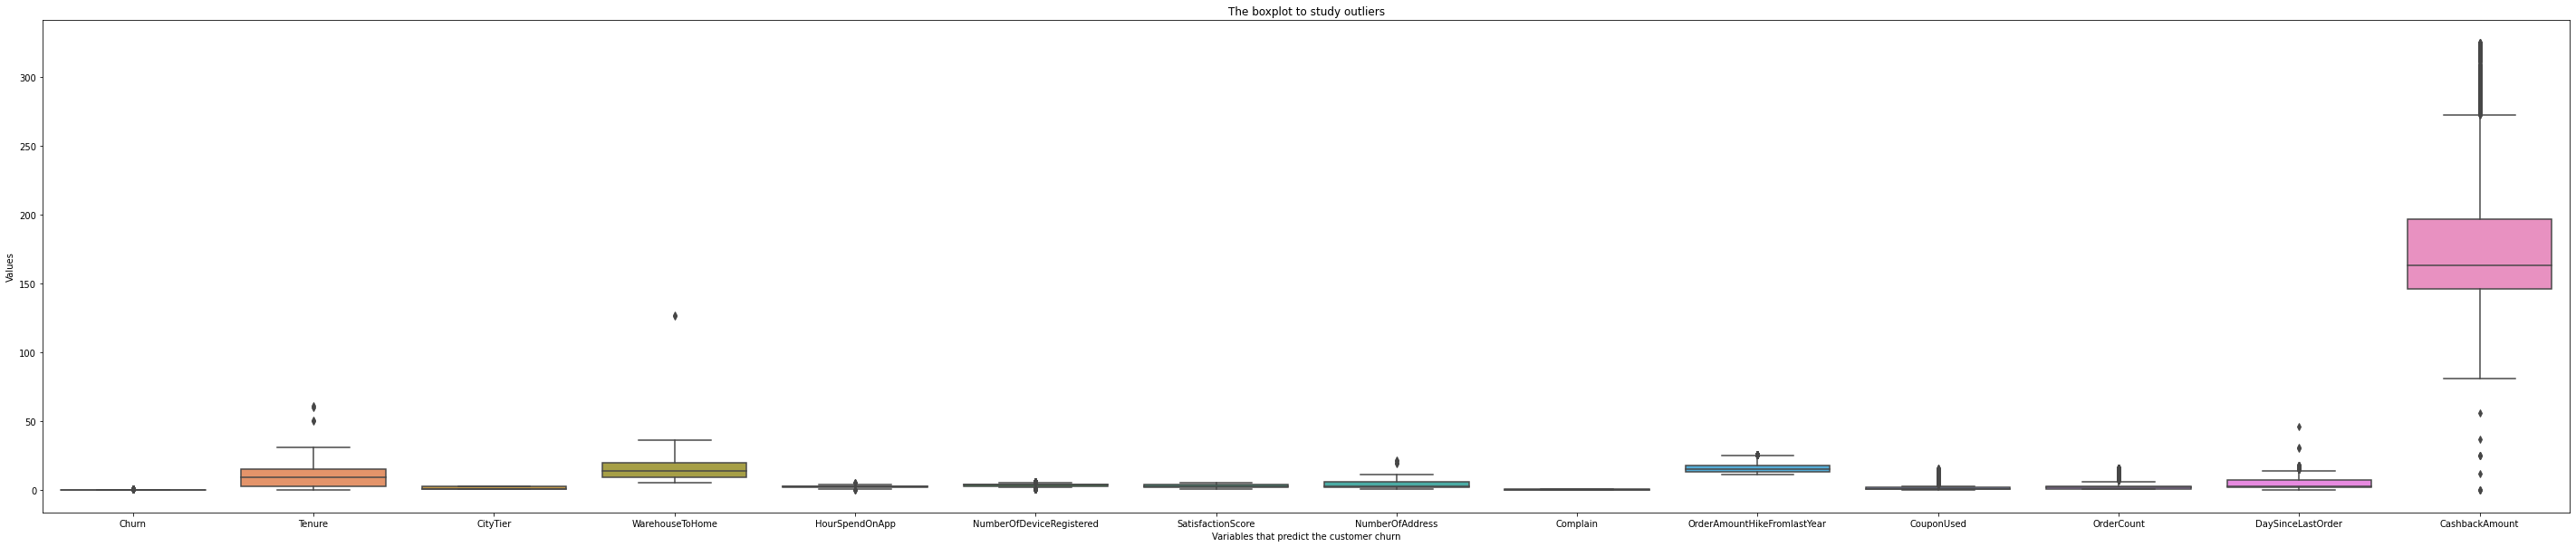

In [196]:
#data_temp = data.copy()
data.drop(['CustomerID'],axis=1, inplace=True)
data.describe().transpose()
plt.figure(figsize=(50,10))
sns.boxplot(data=data)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

In [197]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [198]:
data_temp = data.copy()
for column in data_temp.columns:
  if data_temp[column].dtype != 'category':
    lr,ur=remove_outlier(data_temp[column])
    data_temp[column]=np.where(data_temp[column]>ur,ur,data_temp[column])
    data_temp[column]=np.where(data_temp[column]<lr,lr,data_temp[column])
data = data_temp


Text(0, 0.5, 'Values')

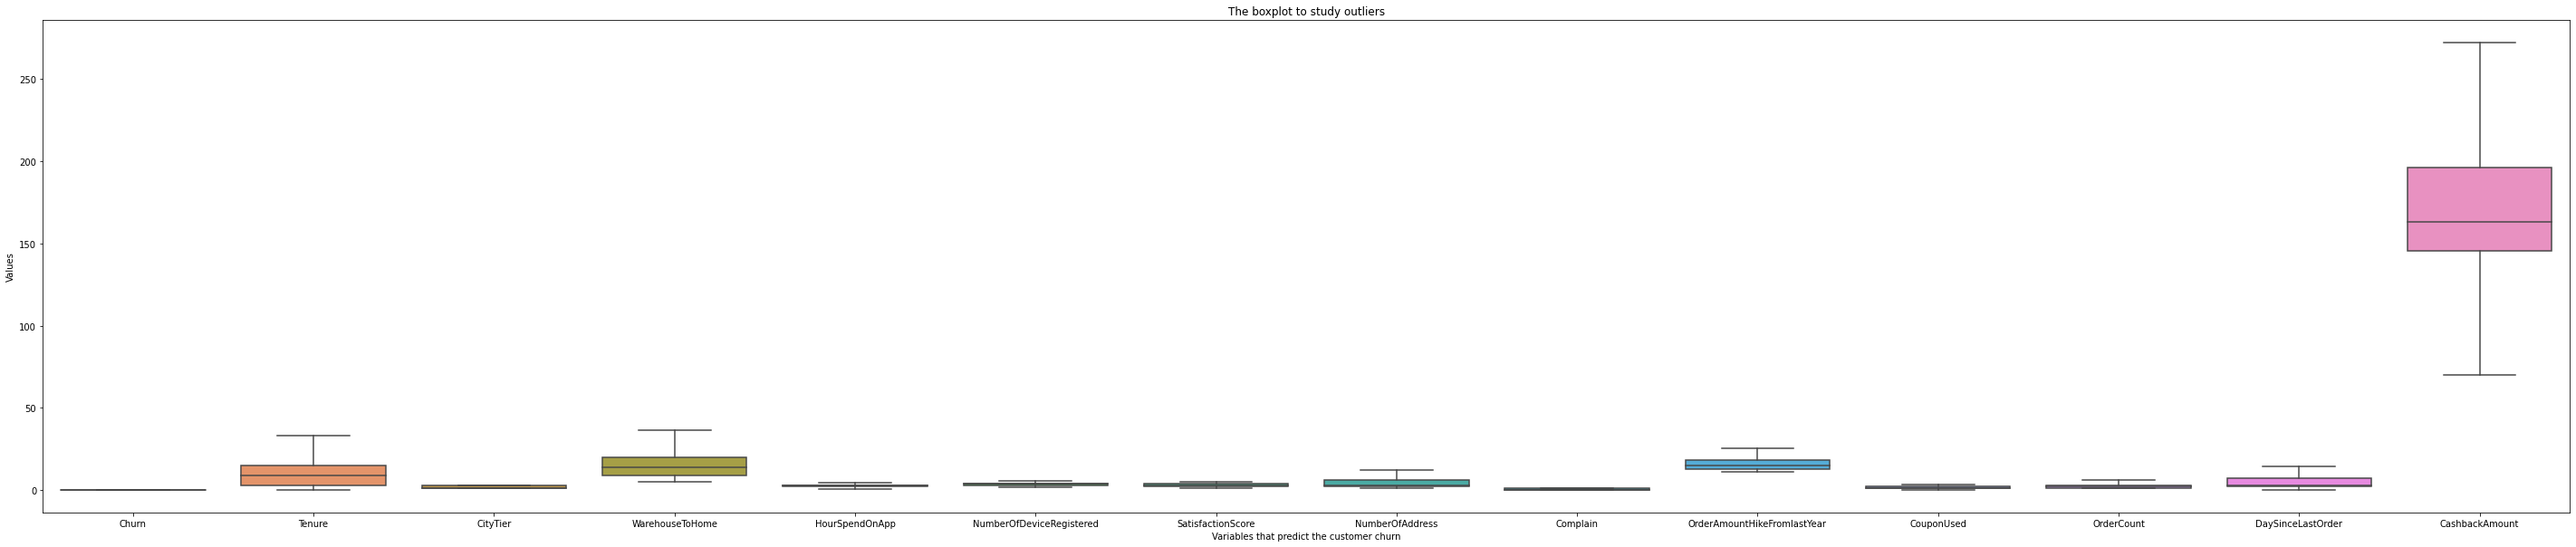

In [199]:
plt.figure(figsize=(50,10))
sns.boxplot(data=data)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

## Бинаризация категориальных признаков

Применим one-hot encodig к признакам `PreferredLoginDevice`, `PreferredPaymentMode`, `Gender`, `PreferedOrderCat`, `MaritalStatus`:

In [200]:
PreferredLoginDevice_dummies = pd.get_dummies(data['PreferredLoginDevice'])

In [201]:
PreferredLoginDevice_dummies.head()

,Computer,Mobile Phone,Phone
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [202]:
data = pd.concat((data, PreferredLoginDevice_dummies), axis=1)
data = data.drop(['PreferredLoginDevice'], axis=1)

In [203]:
features = ['PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
for feature in features:
  dummies = pd.get_dummies(data[feature])
  print(dummies.head())
  data = pd.concat((data, dummies), axis=1)
  data = data.drop([feature], axis=1)

   CC  COD  Cash on Delivery  Credit Card  Debit Card  E wallet  UPI
0   0    0                 0            0           1         0    0
1   0    0                 0            0           0         0    1
2   0    0                 0            0           1         0    0
3   0    0                 0            0           1         0    0
4   1    0                 0            0           0         0    0
   Female  Male
0       1     0
1       0     1
2       0     1
3       0     1
4       0     1
   Fashion  Grocery  Laptop & Accessory  Mobile  Mobile Phone  Others
0        0        0                   1       0             0       0
1        0        0                   0       1             0       0
2        0        0                   0       1             0       0
3        0        0                   1       0             0       0
4        0        0                   0       1             0       0
   Divorced  Married  Single
0         0        0       1
1         0 

In [204]:
data.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,Male,Fashion,Grocery,Laptop & Accessory,Mobile,Mobile Phone,Others,Divorced,Married,Single
0,0.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,...,0,0,0,1,0,0,0,0,0,1
1,0.0,9.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,...,1,0,0,0,1,0,0,0,0,1
2,0.0,9.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,...,1,0,0,0,1,0,0,0,0,1
3,0.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,...,1,0,0,1,0,0,0,0,0,1
4,0.0,0.0,1.0,12.0,3.0,3.0,5.0,3.0,0.0,11.0,...,1,0,0,0,1,0,0,0,0,1


## Отбор признаков

In [219]:
x = data.drop(['Churn'], axis=1)

In [220]:
y = data['Churn']

## Обучение модели
Разобьем данные на обучающую и тестовую выборку 

In [232]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(563, 5067)

### kNN

In [233]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [234]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
err_test = 1 - knn.score(X_test, y_test)

In [235]:
err_test

0.0